In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import joblib
import warnings
warnings.filterwarnings('ignore')


In [2]:

X = pd.read_csv('../processed_data/X_processed.csv')
y = pd.read_csv('../processed_data/y_processed.csv')

print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (614, 14)
y shape: (614, 1)


In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y   # This ensures class balance is maintained
)

print(f"Training set: {X_train.shape}, {y_train.shape}")
print(f"Testing set: {X_test.shape}, {y_test.shape}")


Training set: (491, 14), (491, 1)
Testing set: (123, 14), (123, 1)


In [4]:
model_lr = LogisticRegression()

model_lr.fit(X_train, y_train)


LogisticRegression()

In [11]:
print("\n📊 Logistic Regression Evaluation:")
y_pred = model_lr.predict(X_test)

# 📊 Evaluate model performance
print("Accuracy:", round(accuracy_score(y_test, y_pred), 4))
print("Precision:", round(precision_score(y_test, y_pred), 4))
print("Recall:", round(recall_score(y_test, y_pred), 4))
print("F1 Score:", round(f1_score(y_test, y_pred), 4))

# 🧩 Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# 📝 Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



📊 Logistic Regression Evaluation:
Accuracy: 0.8537
Precision: 0.8317
Recall: 0.9882
F1 Score: 0.9032

Confusion Matrix:
[[21 17]
 [ 1 84]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.55      0.70        38
           1       0.83      0.99      0.90        85

    accuracy                           0.85       123
   macro avg       0.89      0.77      0.80       123
weighted avg       0.87      0.85      0.84       123



In [12]:
joblib.dump(model_lr, '../models/logistic_regression_model.joblib')

['../models/logistic_regression_model.joblib']

In [13]:
#Train Random Forest Classifier
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [14]:
print("\n📊 Random Forest Evaluation:")
y_pred_rf = model_rf.predict(X_test)

print("Accuracy:", round(accuracy_score(y_test, y_pred_rf), 4))
print("Precision:", round(precision_score(y_test, y_pred_rf), 4))
print("Recall:", round(recall_score(y_test, y_pred_rf), 4))
print("F1 Score:", round(f1_score(y_test, y_pred_rf), 4))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))


📊 Random Forest Evaluation:
Accuracy: 0.8293
Precision: 0.8404
Recall: 0.9294
F1 Score: 0.8827

Confusion Matrix:
[[23 15]
 [ 6 79]]

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.61      0.69        38
           1       0.84      0.93      0.88        85

    accuracy                           0.83       123
   macro avg       0.82      0.77      0.78       123
weighted avg       0.83      0.83      0.82       123



In [15]:
joblib.dump(model_rf, '../models/random_forest_model.joblib')

['../models/random_forest_model.joblib']

In [23]:
f1_scores_lr = cross_val_score(model_lr, X_train, y_train, cv=5, scoring='f1')
print("\n Logistic Regression F1 CV scores:", f1_scores_lr)
print("Mean F1 Score (Logistic):", round(f1_scores_lr.mean(), 4))
print("Std Dev (Logistic):", round(f1_scores_lr.std(), 4))


 Logistic Regression F1 CV scores: [0.87417219 0.87581699 0.86486486 0.8627451  0.8627451 ]
Mean F1 Score (Logistic): 0.8681
Std Dev (Logistic): 0.0057


In [24]:
f1_scores_rf = cross_val_score(model_rf, X_train, y_train, cv=5, scoring='f1')
print("\n Random Forest F1 CV scores:", f1_scores_rf)
print("Mean F1 Score (RF):", round(f1_scores_rf.mean(), 4))
print("Std Dev (RF):", round(f1_scores_rf.std(), 4))



 Random Forest F1 CV scores: [0.83561644 0.8630137  0.85714286 0.83221477 0.84768212]
Mean F1 Score (RF): 0.8471
Std Dev (RF): 0.0119


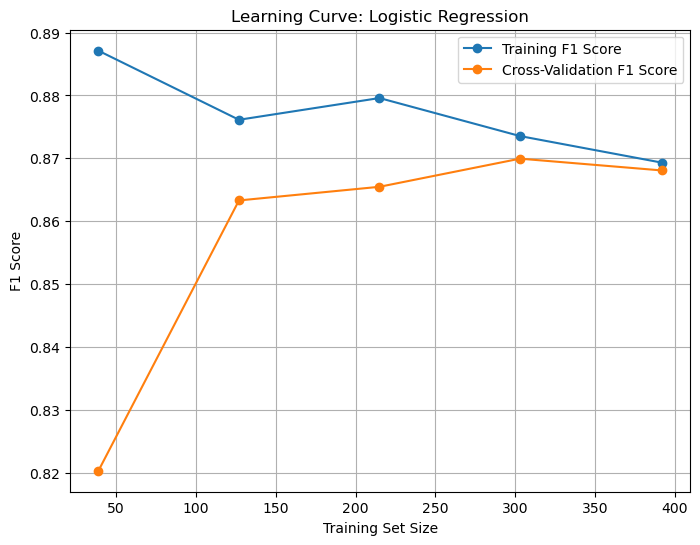

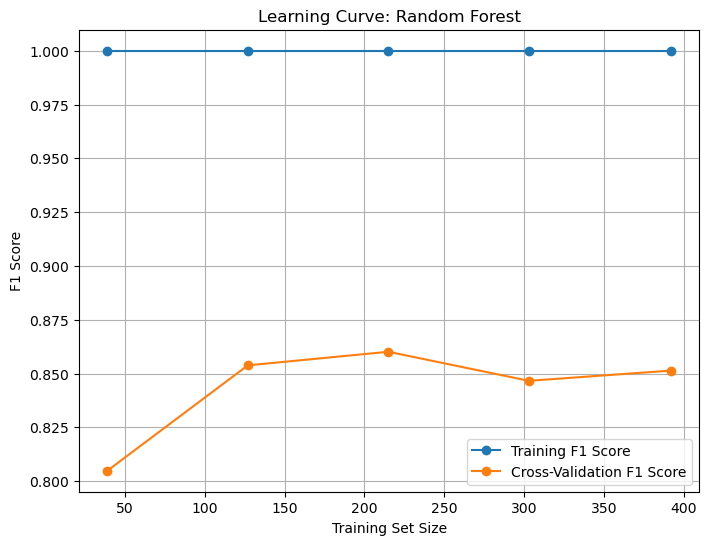

In [26]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

def plot_learning_curve(model, model_name, X_train, y_train):
    train_sizes, train_scores, cv_scores = learning_curve(
        model, X_train, y_train, cv=5, scoring='f1', n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 5),
        shuffle=True,
        random_state=42
    )

    train_scores_mean = train_scores.mean(axis=1)
    cv_scores_mean = cv_scores.mean(axis=1)

    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes, train_scores_mean, 'o-', label="Training F1 Score")
    plt.plot(train_sizes, cv_scores_mean, 'o-', label="Cross-Validation F1 Score")
    plt.title(f'Learning Curve: {model_name}')
    plt.xlabel('Training Set Size')
    plt.ylabel('F1 Score')
    plt.grid(True)
    plt.legend(loc='best')
    plt.show()

plot_learning_curve(model_lr, "Logistic Regression", X_train, y_train)

plot_learning_curve(model_rf, "Random Forest", X_train, y_train)


In [27]:
from xgboost import XGBClassifier

# 🧠 Initialize XGBoost Classifier (basic config)
model_xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# 🚀 Train on same training data
model_xgb.fit(X_train, y_train)

print("✅ XGBoost model trained successfully!")


✅ XGBoost model trained successfully!


In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# 📊 Predict
y_pred_xgb = model_xgb.predict(X_test)

# 🧾 Evaluation
print("📈 XGBoost Evaluation:")
print("Accuracy:", round(accuracy_score(y_test, y_pred_xgb), 4))
print("Precision:", round(precision_score(y_test, y_pred_xgb), 4))
print("Recall:", round(recall_score(y_test, y_pred_xgb), 4))
print("F1 Score:", round(f1_score(y_test, y_pred_xgb), 4))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb))

📈 XGBoost Evaluation:
Accuracy: 0.7886
Precision: 0.8391
Recall: 0.8588
F1 Score: 0.8488

Confusion Matrix:
[[24 14]
 [12 73]]

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.63      0.65        38
           1       0.84      0.86      0.85        85

    accuracy                           0.79       123
   macro avg       0.75      0.75      0.75       123
weighted avg       0.79      0.79      0.79       123



In [31]:
from sklearn.model_selection import cross_val_score

f1_scores_xgb = cross_val_score(model_xgb, X_train, y_train, cv=5, scoring='f1')
print("📊 XGBoost F1 CV scores:", f1_scores_xgb)
print("Mean F1 Score (XGBoost):", round(f1_scores_xgb.mean(), 4))
print("Std Dev (XGBoost):", round(f1_scores_xgb.std(), 4))


📊 XGBoost F1 CV scores: [0.82269504 0.80851064 0.83211679 0.7972028  0.78571429]
Mean F1 Score (XGBoost): 0.8092
Std Dev (XGBoost): 0.0168


NameError: name 'confusion_matrix' is not defined